## CLUSTERING CON PYTHON

In [27]:
import pandas as pd
df=pd.read_csv("../python-ml-course/datasets/wine/winequality-red.csv",sep=";")
df.shape
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [28]:
df.shape


(1599, 12)

In [29]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

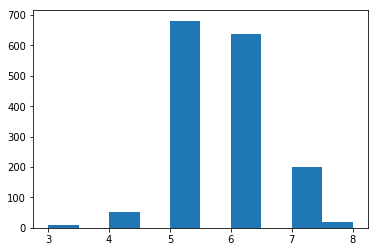

In [30]:
plt.hist(df['quality'])

In [31]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalizacion de los datas

In [32]:
df_norm=(df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


###  Clustering jerarquico con sklearn

In [33]:
from sklearn.cluster import AgglomerativeClustering

In [34]:
clus=AgglomerativeClustering(n_clusters=6,linkage="ward").fit(df_norm)

In [35]:
md_h=pd.Series(clus.labels_)
md_h

0       2
1       2
2       2
3       3
4       2
5       2
6       2
7       2
8       2
9       1
10      2
11      1
12      4
13      5
14      1
15      1
16      0
17      5
18      2
19      5
20      1
21      1
22      5
23      2
24      1
25      2
26      2
27      5
28      2
29      2
       ..
1569    4
1570    0
1571    4
1572    1
1573    4
1574    1
1575    0
1576    0
1577    4
1578    4
1579    4
1580    0
1581    4
1582    4
1583    1
1584    0
1585    0
1586    0
1587    4
1588    0
1589    1
1590    4
1591    4
1592    4
1593    4
1594    4
1595    4
1596    4
1597    4
1598    0
Length: 1599, dtype: int64

Text(0, 0.5, 'Numero de vinos del cluster')

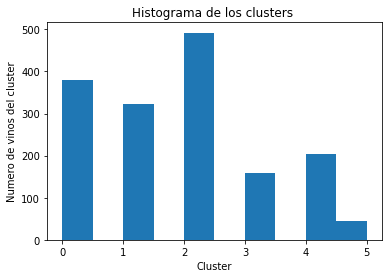

In [45]:
plt.hist(md_h)
plt.title("Histograma de los clusters ")
plt.xlabel("Cluster")
plt.ylabel("Numero de vinos del cluster")

In [46]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int64)

In [47]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [48]:
Z=linkage(df_norm,'ward')

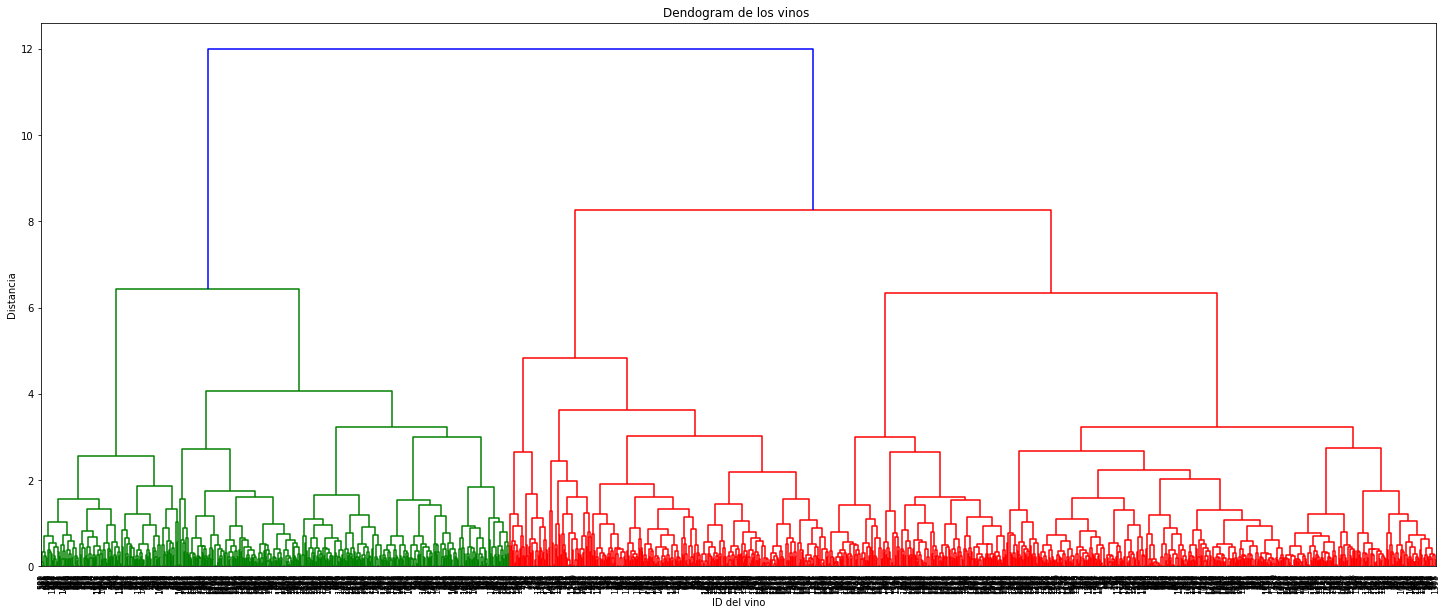

In [49]:
plt.figure(figsize=(25,10))
plt.title("Dendogram de los vinos ")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z,leaf_rotation=90,leaf_font_size=8.)
plt.show()

## k-means

In [50]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [51]:
model=KMeans(n_clusters=6)
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [52]:
model.labels_

array([1, 1, 1, ..., 2, 2, 0])

In [53]:
md_k=pd.Series(model.labels_)

In [54]:
df_norm["clust_h"]=md_h
df_norm["clust_k"]=md_k

In [55]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,1
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,1
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,4
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,1


(array([268.,   0., 526.,   0., 226.,   0.,  28.,   0., 244., 307.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

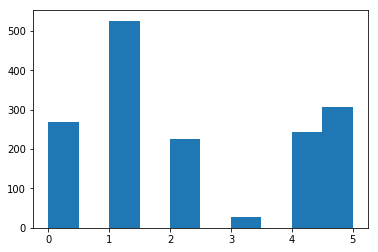

In [56]:
plt.hist(md_k)

In [57]:
model.cluster_centers_

array([[0.36785101, 0.15747035, 0.42597015, 0.1062155 , 0.10605985,
        0.16580828, 0.08513528, 0.41754334, 0.41876249, 0.23920815,
        0.48352468, 0.69626866],
       [0.2631818 , 0.35682848, 0.1234981 , 0.09127429, 0.12334245,
        0.14744551, 0.10981607, 0.4897545 , 0.48582378, 0.15536987,
        0.2221361 , 0.44068441],
       [0.17464171, 0.32288762, 0.09464602, 0.09364771, 0.09582342,
        0.25037392, 0.12589512, 0.32234286, 0.5778343 , 0.18581421,
        0.49110506, 0.61327434],
       [0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.58330915, 0.20754267, 0.50991803, 0.13232652, 0.13111333,
        0.1342646 , 0.09006256, 0.65693231, 0.33041823, 0.22263669,
        0.28799916, 0.5442623 ],
       [0.31993889, 0.27737495, 0.307557  , 0.15479006, 0.12736755,
        0.38294261, 0.29817797, 0.5434167 , 0.43530226, 0.17979676,
        0.21371419,

In [58]:
model.inertia_

186.58540626983216

### Intepretacion Final

In [59]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.367851,0.157470,0.425970,0.106215,0.106060,0.165808,0.085135,0.417543,0.418762,0.239208,0.483525,0.696269,0.108209
1,0.263182,0.356828,0.123498,0.091274,0.123342,0.147446,0.109816,0.489754,0.485824,0.155370,0.222136,0.440684,2.001901
2,0.174642,0.322888,0.094646,0.093648,0.095823,0.250374,0.125895,0.322343,0.577834,0.185814,0.491105,0.613274,3.415929
3,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
4,0.583309,0.207543,0.509918,0.132327,0.131113,0.134265,0.090063,0.656932,0.330418,0.222637,0.287999,0.544262,2.090164
5,0.319939,0.277375,0.307557,0.154790,0.127368,0.382943,0.298178,0.543417,0.435302,0.179797,0.213714,0.456678,1.016287
